
García Cruz Mauricio Iván 

Velázquez Pérez José Juan

**Clustering Jerárquico**

El clutering jerarquico es un algoritmo que se basa en encontrar similitudes entre individuos asignandolos a grupos(Clusters) de tal manera que los grupos estén bien separados dejando a los individuos disimilares(diferentes) en clusters distintos la similitud entre los individuos se grafica mediante un árbol llamado dendrograma. (Es recomendable aplicar está técnica cuando se tienen no más de $10,000$ elementos a análisar, esn otro caso se recomienda utilizar la técnica de k-medias)

**Pasos del método aglomerativo**

***i) Se forman tantos grupos(clusters) como individuos***

***ii) Se agrupan a los individuos en base a una medida de similitud entre ellos formando clusters.***

Una forma de comparar las distancias es en base a la construcción de una matriz de disimilitud la cual contiene la información de las distancias individuo a individuo manteniendo en la diagonal la distancia de cada individuo consigo mismo, existen diversos métodos para medir la similitud entre los individuos como la distancia Euclidiana, o distancia Manhathan. 

***iii) Se van agrupando los clusters en base a una medida de similitud que exista entre ellos, formando así un árbol llamado dendrograma.***

En este paso se utilizan algunas técnicas de aglomeración algunos métodos son: 
Método del centroide: Toma encuenta la distancia entre los centros de gravedad de cada cluster.

Agregación de ward: Toma en cuenta el menos incremento en las distancias que hay entre los  individuos contenidos en cada cluster y el centro de gravedad al que pertenecen.

De manera iterativa se construyen matrices de disimulitud con la técnica deseada y se agrupan los clusters formando grupos de clusters.

***iv) Se continúan agrupando hasta que solo queda un cluster, que contenga la totalidad de los cluster formados previamente.***



In [ ]:
#$ pip install folium
#$ conda install -c conda-forge folium

El problema que se intenta resolver en este ejemplo es el de ver dónde deberíamos poner un sushi roll
en la CDMX, se usaron datos del INEGI y de Google maps 


In [1]:
#Librerias para el algoritmo AGNES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
#librerias para poner clusters en el mapa
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap



La idea es que donde se aglomeren lugares donde se hacen actividades recreativas con muchos trabajadores y restaurantes de alto nivel económico significa que es una zona donde se vende bastante, además de que el público objetivo se encuentra ahí. En otras palabras suponiendo que dichos restaurantes hicieron su tarea, en esa zona se va a vender bien.

In [2]:
#leemos todos los archivos
bene = pd.read_csv('benedetti_GM.csv')
domi = pd.read_csv('dominos_IN.csv')
pizh = pd.read_csv('pizza_hut_IN.csv')
star = pd.read_csv('starbucks_IN.csv')
vips = pd.read_csv('vips_IN.csv')
sushi = pd.read_csv('sushiroll_IN.csv')
sush = pd.read_csv('sushi_roll_IN.csv')
cast = pd.read_csv('la_c_d_to_IN.csv')
toks = pd.read_csv('toks_IN.csv')
supe = pd.read_csv('superama_IN.csv')
gym = pd.read_csv('gym_IN.csv')
smar = pd.read_csv('smart_fit_IN.csv')

In [3]:
#cambiamos el nombre de las columnas
bene.columns = ['Latitud','Longitud']
#juntamos todas las logitudes y latitudes en un solo dataframe
df = pd.concat([bene,domi[['Latitud','Longitud']],pizh[['Latitud','Longitud']],star[['Latitud','Longitud']],vips[['Latitud','Longitud']],cast[['Latitud','Longitud']],toks[['Latitud','Longitud']],supe[['Latitud','Longitud']],gym[['Latitud','Longitud']],smar[['Latitud','Longitud']],sushi[['Latitud','Longitud']],sush[['Latitud','Longitud']]],axis=0)
df.shape

(735, 2)

In [4]:
#creamos un mapa
mapa = folium.Map(location=[19.4326,-99.1332],zoom_start=12)

#ponemos las laitudes y longitudes en el mapa pero con puntos

for i in range(len(df)):
    folium.CircleMarker([df.iloc[i]['Latitud'], df.iloc[i]['Longitud']], radius=1, color='blue', fill_color='red', fill_opacity=0.5).add_to(mapa)

#mapa
#para ver el mapa (no se puede ver en github así que se ve en el archivo html)
mapa.save('mapa1.html')

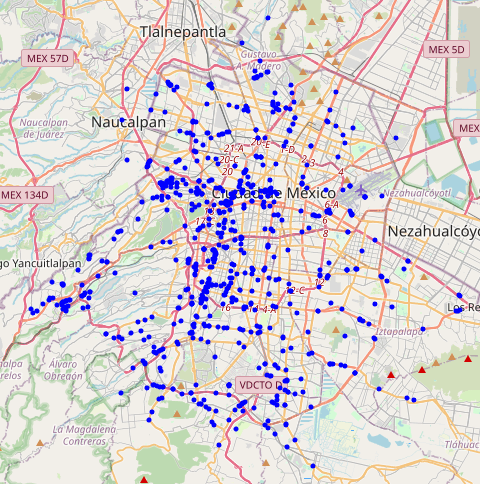

Text(0.5, 1.0, 'Dendrograma')

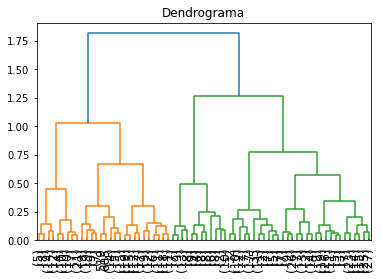

In [5]:
#hacemos el algoritmo de agnes
dendrograma = sch.dendrogram(sch.linkage(df,method='ward'),truncate_mode='lastp',p=70,show_leaf_counts=True,leaf_rotation=90,leaf_font_size=12,show_contracted=True)
plt.title('Dendrograma')

Aquí decidimos que 70 es una buena cantidad de clusters para encontrar dichas regiones. Hay que recalcar que no se recomienda usar estos algoritmos (bottom-up) para grandes cantidades de datos.

In [13]:
#marcamos los puntos del df con el algoritmo de agnes
hc = AgglomerativeClustering(n_clusters=70,affinity='euclidean',linkage='ward')
y_hc = hc.fit_predict(df)
y_hc

array([48, 68, 48, 39, 23, 12, 69,  7, 30, 10, 61, 26,  4, 18, 40, 36, 15,
       17, 14, 34, 51, 13, 20, 55, 65,  3, 21, 33,  2, 44, 69, 53, 58, 14,
       53, 37, 59, 35, 29, 59, 32, 44, 56, 20, 24, 15, 35, 68, 56, 55, 30,
       20, 22, 39, 49, 23, 34, 31, 28, 13, 18, 21, 28, 39, 16, 66, 36, 61,
       23,  3, 26, 47,  8, 15, 46, 25, 38, 50, 26, 33, 23, 26, 17, 16,  8,
       26, 32, 43, 26, 17,  0,  7, 14,  5, 35,  5, 12, 50, 12, 40, 63, 10,
        0, 32, 31,  7,  6,  6, 42,  4, 32,  6, 59, 19, 16, 51, 24, 12,  3,
       60, 66, 43, 23, 56, 59, 31, 13,  6, 45, 21, 11,  2,  0, 17,  3, 41,
       42, 65, 28, 26, 32, 39, 63,  5, 42, 59,  3, 35, 43,  0, 65,  0, 10,
       48, 46, 25, 36, 30, 26, 41, 32, 49, 14, 66, 46,  7, 39,  7, 39, 27,
       27, 46, 33, 45, 27, 39, 45, 19, 29, 19,  4,  6,  7, 29,  6, 59,  0,
       35, 35, 11, 14, 41, 29,  0, 11, 66, 39,  9,  5, 26, 25, 26, 66, 10,
       45,  6, 59, 14, 26,  4, 42, 43, 45, 13, 14, 64, 27,  6,  7, 14, 64,
       64, 17, 59,  2, 48

Hay unos datos (de google maps) que no pertenecen a la CDMX, sin embargo lo podemos ubicar por estar en un cluster con un sólo dato.

In [14]:
#vemos cuáles clusters tienen cuántos puntos
np.unique(y_hc,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69], dtype=int64),
 array([27,  8,  9, 14, 15, 10, 21, 19, 19, 10, 12, 12, 11, 12, 26, 12,  8,
        13, 14, 17,  8, 13,  8, 11,  7, 18, 23,  9,  8,  9, 11,  6, 14,  7,
         4, 17, 15,  1,  2, 26,  9,  7, 10, 25,  7, 10,  9,  9, 11, 15,  7,
         5,  2,  2,  4,  7,  7,  1,  1, 14,  7,  5,  3,  9,  7,  5, 19,  1,
         5,  6], dtype=int64))

In [15]:
#nos quedamos con los clusters que tienen más de 0 puntos y menos de 200 puntos (tiene sentido más tarde)
aux4=np.unique(y_hc,return_counts=True)[1]>0 
aux5=np.unique(y_hc,return_counts=True)[1]<200
aux6=np.unique(y_hc,return_counts=True)[0][aux4*aux5]
#obtenemos un dataframe con los puntos que pertenecen a los clusters que tienen dichas características y ponemos los clusters a los que pertenecen
df2=df.iloc[np.where(np.isin(y_hc,aux6))]
df2['Cluster']=y_hc[np.where(np.isin(y_hc,aux6))]
df2.shape

(735, 3)

In [16]:
#colores (algunos no se ven bien, alejar el mapa para verlos mejor)
color=['red', 'blue', 'green', 'purple', 'orange', 'darkred',
'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']

#creamos un mapa
mapa2 = folium.Map(location=[19.4326,-99.1332],zoom_start=12)

#ponemos los puntos en el mapa
for i in range(len(df2)):
    folium.CircleMarker([df2.iloc[i]['Latitud'], df2.iloc[i]['Longitud']], radius=1, color=color[int(df2.iloc[i]['Cluster'])%15], fill_opacity=0.5).add_to(mapa2)

#para ver el mapa
#mapa2
mapa2.save('mapa2.html')

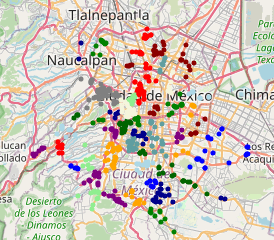

Un cluster de pocos puntos nos habla de una zona de clase media, un cluster muy grande nos habla de una zona muy transitada, por eso nos quedaremos en un rango de la cantidad de puntos.

In [17]:
#nos quedamos con los clusters que tienen más de 5 puntos y menos de 20 usando np.unique
aux4=np.unique(y_hc,return_counts=True)[1]>5 
aux5=np.unique(y_hc,return_counts=True)[1]<20
aux6=np.unique(y_hc,return_counts=True)[0][aux4*aux5]

#obtenemos un dataframe con los puntos que pertenecen a los clusters que tienen dichas características y ponemos los clusters a los que pertenecen
df2=df.iloc[np.where(np.isin(y_hc,aux6))]
df2['Cluster']=y_hc[np.where(np.isin(y_hc,aux6))]
df2.shape

C:\Users\mauiv\AppData\Local\Temp\ipykernel_11324\2698339872.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Cluster']=y_hc[np.where(np.isin(y_hc,aux6))]


(546, 3)

Ponemos los puntos de sushi roll en negro (alejar el zoom si es necesario) y notamos que en la zona norte es claro que hay varias zonas donde sería buena idea poner uno.

In [18]:
mapa2 = folium.Map(location=[19.4326,-99.1332],zoom_start=12)

#ponemos los puntos en el mapa
for i in range(len(df2)):
    folium.CircleMarker([df2.iloc[i]['Latitud'], df2.iloc[i]['Longitud']], radius=1, color=color[int(df2.iloc[i]['Cluster'])%15], fill_opacity=0.5).add_to(mapa2)

#ponemos los puntos de sushi roll en el mapa
for i in range(len(sush)):
    folium.CircleMarker([sush.iloc[i]['Latitud'], sush.iloc[i]['Longitud']], radius=1, color='black', fill_color='black', fill_opacity=0.5).add_to(mapa2)
for i in range(len(sushi)):
    folium.CircleMarker([sushi.iloc[i]['Latitud'], sushi.iloc[i]['Longitud']], radius=1, color='black', fill_color='black', fill_opacity=0.5).add_to(mapa2)

#para ver el mapa
#mapa2
mapa2.save('mapa3.html')

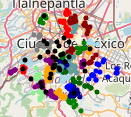

En particular se debería de poner uno en la zona norte cercano al IPN y al cablebus, decir algo de las otras zonas depende un poco de la cantidad de clusters y de quién lo vea para llegar a una conclusión.

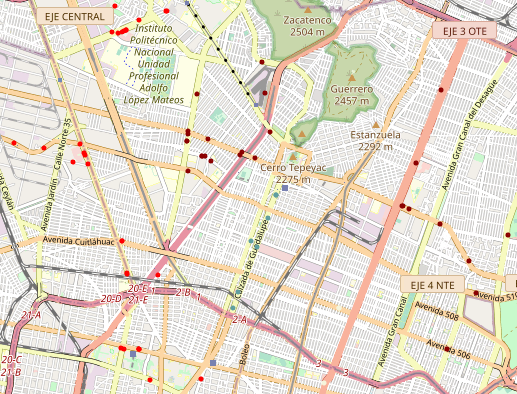

(Zona exacta donde se debería de poner)

In [12]:
#aplicamos el algoritmo de clustering que tiene folium
mapa3 = folium.Map(location=[19.4326,-99.1332],zoom_start=12)
FastMarkerCluster(data=list(zip(df2['Latitud'].values, df2['Longitud'].values))).add_to(mapa3)
#mapa3
mapa3.save('mapa4.html')

Este último algoritmo que tiene implementado folium también es bottom-up y puedes ver cómo cambia el dendrograma haciendo zoom al mapa.

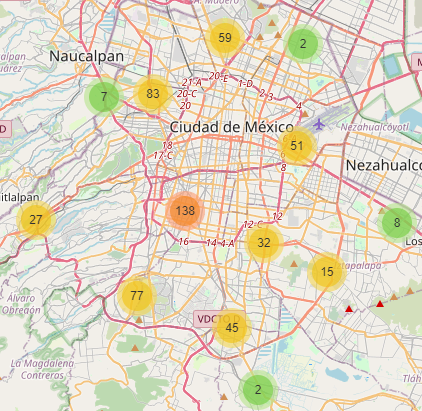